In [24]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt

import multiprocessing
print("num of cpus:", multiprocessing.cpu_count())

num of cpus: 128


In [19]:
folder_path = ('TDS_05_15k')
#folder_path = ('Ground Truth Smoothed')

def load_data(folder_path):
  """
  """
  data = {}
  for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)
      if os.path.isfile(file_path):
          with open(file_path, 'r') as file:
              df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
              #df1 = df1.fillna(df1.mean()) # Replace NaN with column average
              data[filename] = df1
    
              num_datapts = len(df1["des_flux"])
  # Combine all the data into a single dataframe
  df = pd.concat(data.values())

  return df, num_datapts

df, num_datapts = load_data(folder_path)

# Reshape des_flux
des_flux = df['des_flux'].values.reshape(-1, num_datapts)

# Reshape detrap_en
detrap_en = df['detrap_en'].dropna().values.reshape(-1, 4)

# Reshape def_conc
def_conc = df['def_conc'].dropna().values.reshape(-1, 4)

# Split the data into input features and target variables
X = des_flux
y = np.concatenate([detrap_en, def_conc], axis=1)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Define the data preprocessing steps and the model
preprocessor = make_pipeline(StandardScaler())
model = LinearRegression()

# Fit the model using cross-validation
pipeline = make_pipeline(preprocessor, model)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Fit the model on the entire training set and evaluate on the test set
pipeline.fit(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Test set score: {test_score}")


from sklearn.linear_model import MultiTaskLassoCV

# Perform feature selection using MultiTaskLassoCV
lasso_cv = MultiTaskLassoCV(cv=5)
lasso_cv.fit(X_train_norm, y_train)

# Get the selected features using indices
selected_feature_indices = np.where(lasso_cv.coef_[0] != 0)[0]
selected_features = [f"Feature_{idx}" for idx in selected_feature_indices]
print("Selected Features:")
print(selected_features)


<ipython-input-19-f67933d1d169>:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
<ipython-input-19-f67933d1d169>:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
<ipython-input-19-f67933d1d169>:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
<ipython-input-19-f67933d1d169>:12: FutureWarning: The squeeze argument has bee

Cross-validation score: [-0.01728746 -0.00658221 -0.04155202 -0.00745962 -0.00662724]
Mean cross-validation score: -0.015901708278604727
Test set score: 0.4505430931536206


/home/nhoang/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08111411226047949, tolerance: 0.0801280824879236
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/nhoang/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08252492390624866, tolerance: 0.0801280824879236
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/nhoang/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10940319801915166, tolerance: 0.0801280824879236
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/nhoang/.local/lib/python3.8/site-packages/skle

Selected Features:
['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50', 'Feature_51', 'Feature_52', 'Feature_53', 'Feature_54', 'Feature_55', 'Feature_56', 'Feature_57', 'Feature_58', 'Feature_59', 'Feature_60', 'Feature_61', 'Feature_62', 'Feature_63', 'Feature_64', 'Feature_65', 'Feature_66', 'Feature_67', 'Feature_68', 'Feature_69', 'Feature_7

/home/nhoang/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.78086321022951, tolerance: 0.10089046267924534
  ) = cd_fast.enet_coordinate_descent_multi_task(


Using MultiTaskLassoCV to perform feature selection for multi-task outputs, which provides coefficients for each tasks.

In [20]:
print(f"Cross-validation score: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Test set score: {test_score}")


Cross-validation score: [-0.01728746 -0.00658221 -0.04155202 -0.00745962 -0.00662724]
Mean cross-validation score: -0.015901708278604727
Test set score: 0.4505430931536206


## XGBoost GridSearchCV 

In [22]:
%%time
# Optimize hyperparameters using GridSearchCV
param_grid = {
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.1, 0.01, 0.001]
}

xgbmodel = xgb.XGBRegressor()
pipeline = make_pipeline(preprocessor, xgbmodel)

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print(f"Test set score: {test_score}")

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)



Test set score: 0.6520125049602459
Mean Squared Error: 0.002944585429784768
CPU times: user 2d 11h 19min 59s, sys: 1min 44s, total: 2d 11h 21min 44s
Wall time: 3h 20min 47s


6/3/2022
Test set score: 0.6520125049602459
Mean Squared Error: 0.002944585429784768
CPU times: user 2d 11h 19min 59s, sys: 1min 44s, total: 2d 11h 21min 44s
Wall time: 3h 20min 47s

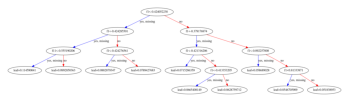

In [40]:
# Plot the first tree in the XGBoost model
xgb.plot_tree(best_model.named_steps['xgbregressor'], num_trees=0)

# Save the figure (adjust the file path as needed)
plt.savefig('xgboost_tree.png', dpi=300)
plt.show()

## Randon Forest Regression  ( For comparision )

In [27]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [3, 5, 7]
}

# Create the Random Forest Regression model
rfr_model = RandomForestRegressor()

# Create the pipeline
pipeline = make_pipeline(preprocessor, rfr_model)

# Perform grid search to find the best hyperparameters
rfr_grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
rfr_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
rfr_best_params = rfr_grid_search.best_params_
rfr_best_model = rfr_grid_search.best_estimator_

# Evaluate the best model on the test set
rfr_test_score = rfr_best_model.score(X_test, y_test)
print(f"RFR Test set score: {rfr_test_score}")

# Make predictions on the test set using the best model
rfr_predictions = rfr_best_model.predict(X_test)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, rfr_predictions)
print('Mean Squared Error:', mse)



RFR Test set score: 0.5048131313455275
Mean Squared Error: 0.002944585429784768
CPU times: user 1h 22min 51s, sys: 93 ms, total: 1h 22min 51s
Wall time: 1h 23min 15s


6/30/2023
RFR Test set score: 0.5048131313455275
Mean Squared Error: 0.002944585429784768
CPU times: user 1h 22min 51s, sys: 93 ms, total: 1h 22min 51s
Wall time: 1h 23min 15s

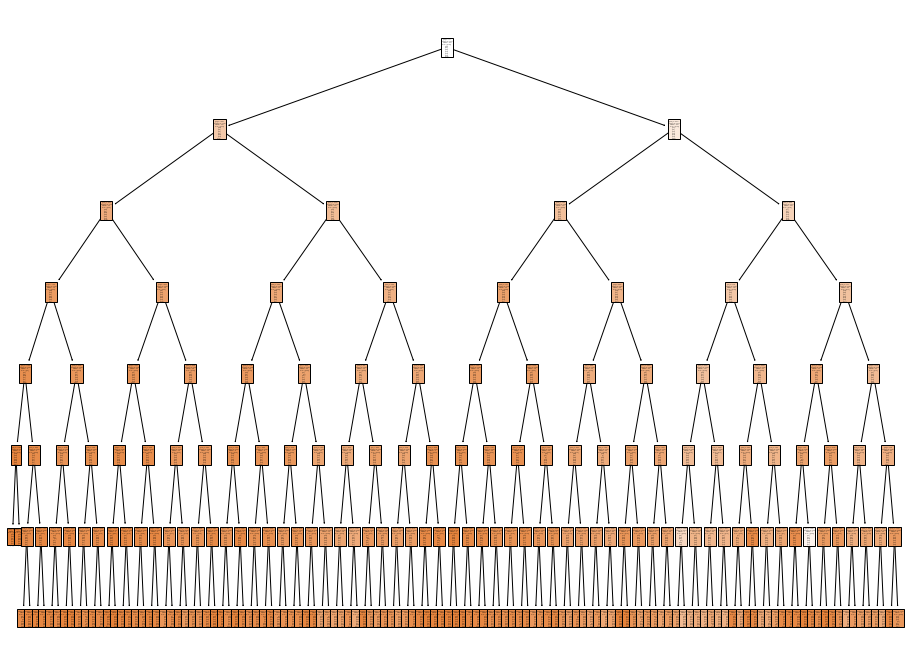

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Access the Random Forest Regression model from the pipeline
rfr_model = rfr_best_model.named_steps['randomforestregressor']

# Get the first tree in the Random Forest Regression model
rfr_tree = rfr_model.estimators_[0]

# Plot the first tree
plt.figure(figsize=(16, 12))
plot_tree(rfr_tree, filled=True)
plt.savefig('rfr_tree.png', dpi=600)
plt.show()

In [39]:
# Getting values of the best parameters

# Print the best parameter values for Random Forest Regression
print("Random Forest Regression - Best Parameters:")
display(rfr_model.get_params())

# Print the best parameter values for XGBoost
print("XGBoost - Best Parameters:")
display(xgbmodel.get_params())

Random Forest Regression - Best Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

XGBoost - Best Parameters:


{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

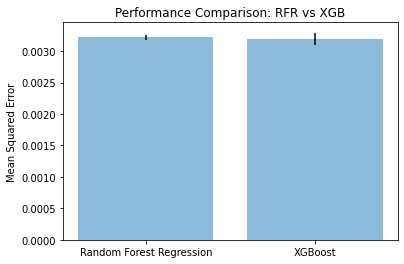

In [32]:
# Train and evaluate Random Forest Regression
rfr_scores = -cross_val_score(rfr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rfr_mean_score = np.mean(rfr_scores)
rfr_std_score = np.std(rfr_scores)

# Train and evaluate XGBoost
xgb_scores = -cross_val_score(xgbmodel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_mean_score = np.mean(xgb_scores)
xgb_std_score = np.std(xgb_scores)

# Plot performance comparison
labels = ['Random Forest Regression', 'XGBoost']
mean_scores = [rfr_mean_score, xgb_mean_score]
std_scores = [rfr_std_score, xgb_std_score]

x_pos = np.arange(len(labels))

plt.bar(x_pos, mean_scores, yerr=std_scores, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Mean Squared Error')
plt.title('Performance Comparison: RFR vs XGB')

plt.show()

In [56]:
print("Accuracy Scores:")
print(f"XGBoost Test set score: {test_score}")
print(f"Random Forest Regression Test set score: {rfr_test_score}")

print("Efficiency:")
print("XGBoost Training Time:", " CPU Times: 2 days, 11 hours, and 59 seconds")  # Replace "XXX" with the actual training time
print("XGBoost Prediction Time:", "Wall time: 3 hours, 20 mins, and 47 seconds")  # Replace "XXX" with the actual prediction time
print("Random Forest Regression Training Time:", " CPU times:")  # Replace "XXX" with the actual training time
print("Random Forest Regression Prediction Time:", "XXX")  # Replace "XXX" with the actual prediction time


Accuracy Scores:
XGBoost Test set score: 0.6520125049602459
Random Forest Regression Test set score: 0.5048131313455275
Efficiency:
XGBoost Training Time:  CPU Times: 2 days, 11 hours, and 59 seconds
XGBoost Prediction Time: Wall time: 3 hours, 20 mins, and 47 seconds
Random Forest Regression Training Time: XXX
Random Forest Regression Prediction Time: XXX
